<a href="https://colab.research.google.com/github/capajaro/AnalisisResults/blob/main/AnalisisEncuesta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
Datos_Encuesta = pd.read_csv('https://raw.githubusercontent.com/capajaro/AnalisisResults/main/Respuesta%20de%20formulario_Short.csv', encoding= 'unicode_escape')

In [6]:
Datos_Encuesta.head(5)

,ID,¿En que Ciudad o Municipio resides?,¿Qué edad tienes?,¿Comparas precios al momento de realizar una compra?,¿Cuántas opciones revisas?,¿Realizas compras por internet y-o plataformas digitales?,Ordena por orden de importancia los factores más relevante al momento de realizar la compra final a través de una plataforma digital,Usualmente- porque medio adquiere sus productos farmacéuticos en tiempo de pandemia,¿Cuál de estos factores es más relevante al momento de realizar la compra final de productos farmacéuticos a través de una plataforma digital?,¿ A través de que dispositivos realizas las compras por internet?
0,1,Barranquilla,24,Si,4 a 8,Si,Precio-Calidad-Distancia - Tiempo de Domicilio-,Servicios a domicilio a través de plataforma d...,Distancia - tiempo del domicilio,Smartphone
1,2,Barranquilla,26,Si,2 a 4,Si,Distancia - Tiempo de Domicilio-Precio-Calidad-,Servicios a domicilio a través de plataforma d...,Distancia - tiempo del domicilio,Smartphone
2,3,Barranquilla,27,Si,2 a 4,Si,Calidad-Precio-Distancia - Tiempo de Domicilio-,Servicios a domicilio a través de llamada tele...,NaN,Computador de mesa
3,4,Barranquilla,22,Si,2 a 4,Si,Calidad-Precio-Distancia - Tiempo de Domicilio-,Servicios a domicilio a través de plataforma d...,Distancia - tiempo del domicilio,Smartphone
4,5,Barranquilla,40,Si,2 a 4,Si,Distancia - Tiempo de Domicilio-Calidad-Precio-,Servicios a domicilio a través de llamada tele...,NaN,Smartphone


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


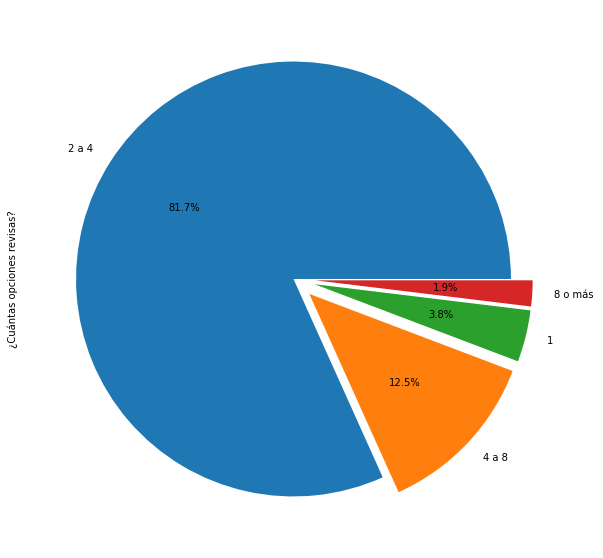

In [7]:
Datos_Encuesta['¿Cuántas opciones revisas?'].loc[Datos_Encuesta['¿Cuántas opciones revisas?'] == 'NaN'] = ''
Preg_COR = pd.DataFrame(Datos_Encuesta['¿Cuántas opciones revisas?'].value_counts())
plot = Preg_COR.plot.pie(y='¿Cuántas opciones revisas?', legend=False, \
                   autopct='%1.1f%%', explode=(0, 0.1, 0.1,0.1), \
                   shadow=False, startangle=0, figsize = (10,10))

Text(0, 0.5, 'Porcentaje [%]')

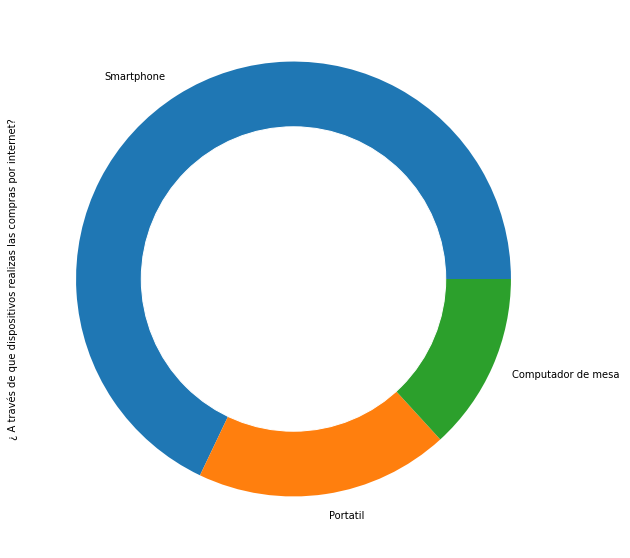

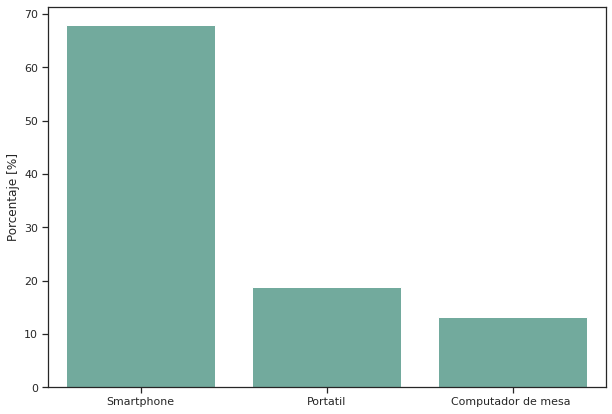

In [8]:

Preg_Disp = pd.DataFrame(Datos_Encuesta['¿ A través de que dispositivos realizas las compras por internet?'].value_counts())
Preg_Disp['Perc'] = 100*Preg_Disp['¿ A través de que dispositivos realizas las compras por internet?']*(1/np.sum(Preg_Disp['¿ A través de que dispositivos realizas las compras por internet?']))
plot = Preg_Disp.plot.pie(y='¿ A través de que dispositivos realizas las compras por internet?', legend=False, \
                   explode=(0, 0.0, 0.0), \
                   shadow=False, startangle=0, figsize = (10,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

# set plot style: grey grid in the background:
sns.set(style="ticks")

# Set the figure size
plt.figure(figsize=(10, 7))

# plot a bar chart
sns.barplot(
    x=Preg_Disp.index,
    y='Perc', 
    data=Preg_Disp, 
    estimator=sum, 
    ci=None, 
    color='#69b3a2');
plt.ylabel('Porcentaje [%]')

([<matplotlib.axis.XTick at 0x7f5b6f6ab750>,
 <a list of 19 Text major ticklabel objects>)

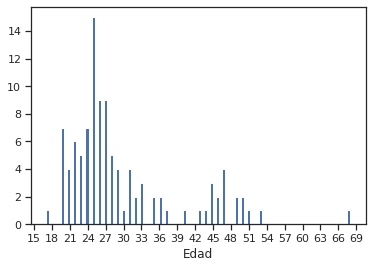

In [9]:
plt.hist(Datos_Encuesta['¿Qué edad tienes?'], bins = 100)
plt.xlabel('Edad')
plt.xticks(ticks = np.arange(15,70,3))

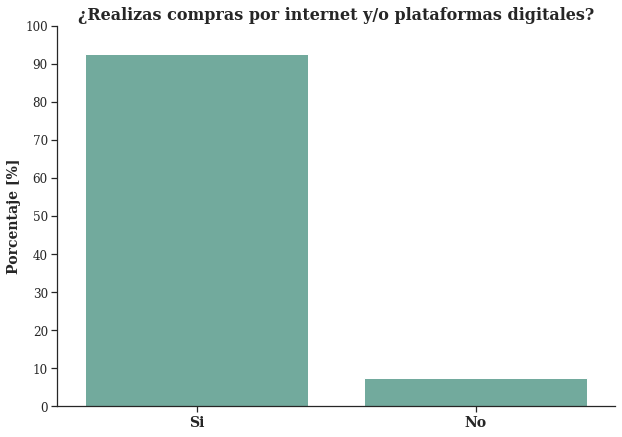

In [60]:
Datos_Encuesta['¿Realizas compras por internet y-o plataformas digitales?'].value_counts()
Preg_CPI = pd.DataFrame(Datos_Encuesta['¿Realizas compras por internet y-o plataformas digitales?'].value_counts())
Preg_CPI['Perc'] = 100*Preg_CPI['¿Realizas compras por internet y-o plataformas digitales?']*(1/np.sum(Preg_CPI['¿Realizas compras por internet y-o plataformas digitales?']))
# set plot style: grey grid in the background:
sns.set(style="ticks")

# Set the figure size
plt.figure(figsize=(10, 7))

# plot a bar chart
chart  = sns.barplot(
    x=Preg_CPI.index,
    y='Perc', 
    data=Preg_CPI, 
    estimator=sum, 
    ci=None, 
    color='#69b3a2');
plt.ylim([0,100])
plt.ylabel('Porcentaje [%]', fontdict={'fontsize' : 14, 'fontname' : 'serif', 'fontweight' : 'bold'})
chart.set_xticklabels(['Si','No'], fontdict={'fontsize' : 14, 'fontname' : 'serif', 'fontweight' : 'bold'})
chart.set_yticks(np.arange(0,110,10).tolist())
chart.set_yticklabels(np.arange(0,110,10).tolist(), fontdict={'fontsize' : 12, 'fontname' : 'serif'})
plt.title('¿Realizas compras por internet y/o plataformas digitales?', fontdict={'fontsize' : 16, 'fontname' : 'serif', 'fontweight' : 'bold'})
chart.grid(b=True, which='both', color='w', linewidth=1.0)
sns.despine()


In [34]:
np.arange(0,100,10).tolist()

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90]

In [11]:
# KMeans está en el paquete sklearn.cluster
from sklearn.cluster import KMeans


In [12]:
kmeans = KMeans(n_clusters=8, random_state=42) # K-Means con K=8
kmeans.fit(Datos_Encuesta);                     # haz 8 grupos con nuestros datos

ValueError: ignored

In [1]:
# Activando R magic 
%load_ext rpy2.ipython

In [3]:
%%R

### Quiz 4 - Solution ###

#1. Load the data
Class = read.csv("/content/Respuesta de formulario_Short.csv")


R[write to console]: Error in make.names(col.names, unique = TRUE) : 
  invalid multibyte string at '<bf>En qu<65> Ciudad o Municipio resides?'




Error in make.names(col.names, unique = TRUE) : 
  invalid multibyte string at '<bf>En qu<65> Ciudad o Municipio resides?'


RInterpreterError: ignored

In [ ]:
%%R

### Quiz 4 - Solution ###

#1. Load the data
Class = read.csv("https://raw.githubusercontent.com/capajaro/AnalisisResults/main/Respuesta%20de%20formulario_Short.csv'", header=TRUE)

#7. Compute distances
distance = dist(Class, method = "manhattan")

#8. Hierarchical clustering
clusterIntensity = hclust(distance, method="ward")

#9. Plot the dendrogram
plot(clusterIntensity)

#10. Select 5 clusters
rect.hclust(clusterIntensity, k = 5, border = "red")

#15. Let's use KMC. Specify number of clusters
k = 5

#16. Run k-means
set.seed(1)
KMC = kmeans(Class[,2:3], centers = k, iter.max = 1000)
str(KMC)

#17. Extract clusters
Class$Cluster = KMC$cluster
Centers = as.data.frame(KMC$centers)
Class$Lat_Center = 0L
Class$Long_Center = 0L
Class$DistCenter = 0L
Tag = 1:nrow(Class)

Class = cbind(Tag,Class[,1:(ncol(Class))])